Libraies dependencies:
1. numpy
2. pandas
3. matplotlib
4. seaborn
5. sklearn --> model_selection --> train_test_split
6. sklearn --> ensemble --> RandomForestRegressor
7. sklearn --> metrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Importing data directly from the kaggle. [Dataset](https://https://www.kaggle.com/altruistdelhite04/gold-price-data)

In [ ]:
# installing kaggle in this colab
! pip install -q kaggle 

In [ ]:
# uplaoding genrated token from the kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamsoni07","key":"7459209826438ab2f84eb807f093e98d"}'}

In [ ]:
# making directory
#Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d altruistdelhite04/gold-price-data

  0% 0.00/41.9k [00:00<?, ?B/s]
100% 41.9k/41.9k [00:00<00:00, 23.2MB/s]


In [ ]:
! unzip /content/gold-price-data.zip

Archive:  /content/gold-price-data.zip
  inflating: gld_price_data.csv      


In [ ]:
# loading data into pandas DataFrame
gold_data = pd.read_csv('/content/gold-price-data.zip')

In [ ]:
# first five rows of the data set
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# shape of the data
gold_data.shape

(2290, 6)

In [ ]:
# statiscal measure of the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# the above dataset has not any null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting some stastical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding the correlation amongs the columns. There are two type correlation: 
1. postive correlation
2. negative correlation

In [ ]:
correlation = gold_data.corr()

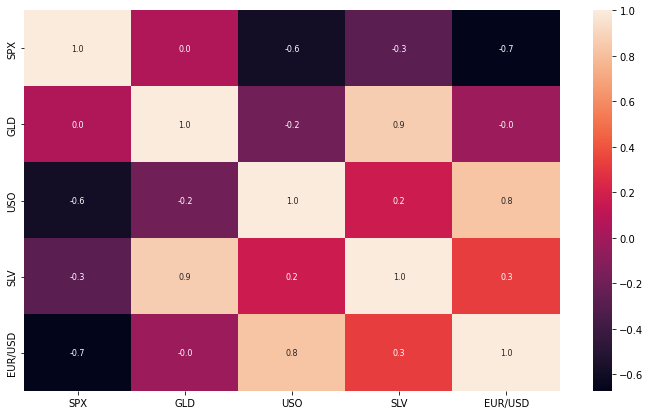

In [ ]:
# ploting the heatmap for understanding the dataset
plt.figure(figsize = (12,7))
sns.heatmap(correlation,cbar =True,fmt = '0.01f',annot = True, annot_kws = {'size':8 })

In [ ]:
# correlation of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


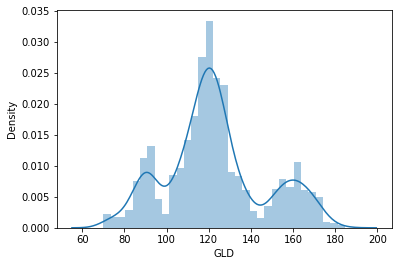

In [ ]:
# the value of gold are correlated to the all vaules
# lets see the distribution of the gold values
sns.distplot(gold_data['GLD'])

Labelling features and target values

In [ ]:
X = gold_data.drop(['Date','GLD'], axis = 1)
Y= gold_data.GLD

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
# split data train and test
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)

In [ ]:
# shape of the train, test dataset
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [ ]:
# loading randomForst model for training the dataset
rand_reg =  RandomForestRegressor()

In [ ]:
# fitting the values
rand_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# model evaulation on train data set
#  model Evalution on training data
X_train_prediction = rand_reg.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : 0.9986925524698361


Text(0.5, 1.0, 'Predicted vs Actual values')

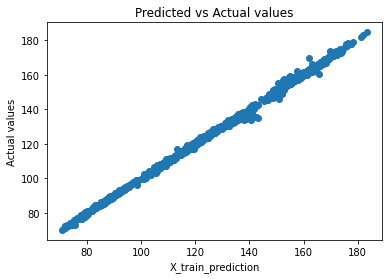

In [ ]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
#  model Evalution on test data
X_test_prediction = rand_reg.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : 0.9879770909848389


Text(0.5, 1.0, 'Predicted vs Actual values')

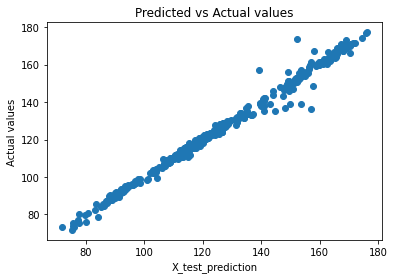

In [ ]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_test_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
# saving this model weight of randomForest regression
import joblib 
joblib.dump(rand_reg,'Gold_Price_Prediction.sav')

['Gold_Price_Prediction.sav']

In [ ]:
# traing with linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# model evaulation on train data set
#  model Evalution on training data
X_train_prediction = lin_reg.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : 0.868992496590915


Text(0.5, 1.0, 'Predicted vs Actual values')

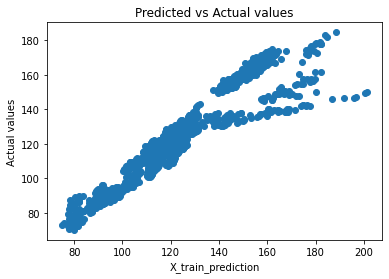

In [ ]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
#  model Evalution on test data
X_test_prediction = lin_reg.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : 0.8511368507177537


Text(0.5, 1.0, 'Predicted vs Actual values')

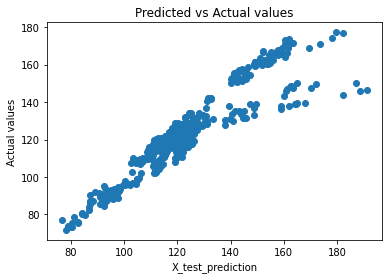

In [ ]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_test_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
# traing this data with XGBRessor
from xgboost import XGBRegressor
xg_regressor = XGBRegressor()
xg_regressor.fit(X_train,Y_train)

[07:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#  model Evalution on training data
X_train_prediction = xg_regressor.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : 0.9858119678402301


Text(0.5, 1.0, 'Predicted vs Actual values')

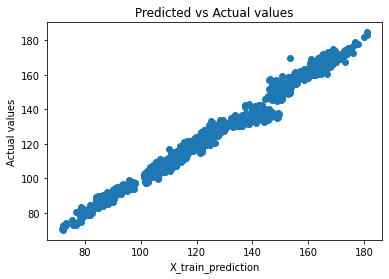

In [ ]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
#  model Evalution on test data
X_test_prediction = xg_regressor.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : 0.9751306608396536


Text(0.5, 1.0, 'Predicted vs Actual values')

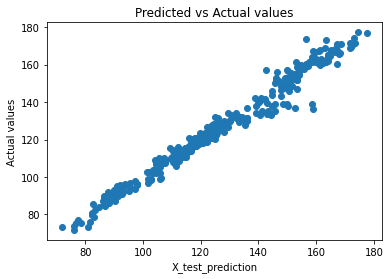

In [ ]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_test_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
# training with lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train,Y_train)

Lasso()

In [ ]:
#  model Evalution on training data
X_train_prediction = lasso_reg.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : 0.8660310262072475


Text(0.5, 1.0, 'Predicted vs Actual values')

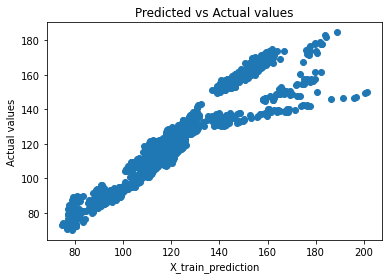

In [ ]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
#  model Evalution on test data
X_test_prediction = lin_reg.predict(X_test)
# R square error
score_2 = metrics.r2_score(X_test_prediction,Y_test)
print('R square error :',score_2)


R square error : 0.8511368507177537


Text(0.5, 1.0, 'Predicted vs Actual values')

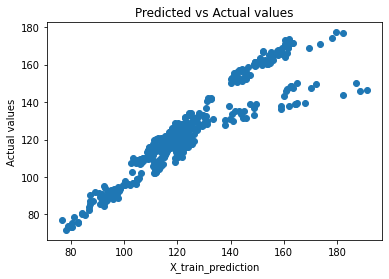

In [ ]:
# visualize actual and predicted values on test data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
# support vector regression
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(X_train,Y_train)
#  model Evalution on training data
X_train_prediction = svm_reg.predict(X_train)
# R square error
score_1 = metrics.r2_score(X_train_prediction,Y_train)
print('R square error :',score_1)


R square error : -37.29275333122383


Text(0.5, 1.0, 'Predicted vs Actual values')

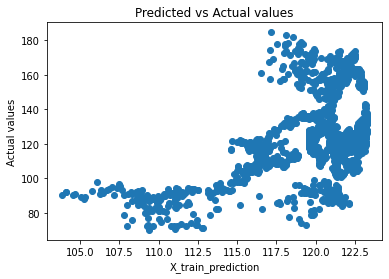

In [ ]:
# visualize actual and predicted values on training data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
import joblib
joblib.dump(xg_regressor,'gold_pricr_xg_regressor.dat')

['gold_pricr_xg_regressor.dat']